# Jimmy Liang
SJSU 001869817
### CMPE 258 - HW3 Part a - Using just Numpy


In [50]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable


## Helper Functions

In [51]:
# 3D plot function

def plot_3d(x, y, y_pred=None):
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  from sklearn.manifold import TSNE

  tsne = TSNE(n_components=2, random_state=0)
  x_2d = tsne.fit_transform(x)

  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x_2d[:, 0], x_2d[:, 1], y, label='underlying function')
  if y_pred is not None:
    ax.scatter(x_2d[:, 0], x_2d[:, 1], y_pred, label='our function')
  plt.legend()

In [52]:
# Linear class

class Linear:
  def __init__(self, input_dim: int, num_hidden: int = 1):
    self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros(num_hidden)

  def __call__(self, x):
    self.x = x
    output = x @ self.weights + self.bias
    return output

  def backward(self, gradient):
    self.weights_gradient = self.x.T @ gradient
    self.bias_gradient = gradient.sum(axis=0)
    self.x_gradient = gradient @ self.weights.T
    return self.x_gradient

  def update(self, lr):
    self.weights = self.weights - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient



In [53]:
# MSE

class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_pred - y_true) ** 2).mean()

  def backward(self):
    n = self.y_true.shape[0]
    self.gradient = 2. * (self.y_pred - self.y_true) / n
    return self.gradient


In [54]:
#ReLU

class Relu:
    def __call__(self, input_):
        self.input_ = input_
        self.output = np.clip(self.input_, 0, None)
        return self.output
    
    def backward(self, output_gradient):
      # import pdb; pdb.set_trace()  # By the way, this is how you can debug
      self.input_gradient = (self.input_ > 0) * output_gradient
      return self.input_gradient

relu = Relu()


In [55]:
# Model

class Model:
  def __init__(self, input_dim, num_hidden):
    self.linear1 = Linear(input_dim, num_hidden)
    self.relu = Relu()
    self.linear2 = Linear(num_hidden, 2)
  
  def __call__(self, x):
    l1 = self.linear1(x)
    r = self.relu(l1)
    l2 = self.linear2(r)
    return l2
  
  def backward(self, output_gradient):
    linear2_gradient = self.linear2.backward(output_gradient)
    relu_gradient = self.relu.backward(linear2_gradient)
    linear1_gradient = self.linear1.backward(relu_gradient)
    return linear1_gradient

  def update(self, lr):
    self.linear2.update(lr)
    self.linear1.update(lr)

In [56]:
# Fit function

from typing import Callable
def fit(x , y, model: Callable, loss: Callable, lr: float, num_epochs: int):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y_pred, y)
    if epoch % 5 == 0:
      print(f'Epoch {epoch}, loss {loss_value}')
    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(lr)

## Creating the test data

x: (100, 3), weights1: (3, 1), bias1: (1,),   weights2: (3, 1), bias2: (1,), y1: (100, 1),   y2: (100, 1),y: (100, 2)


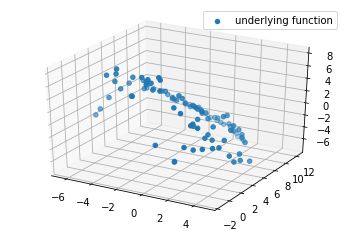

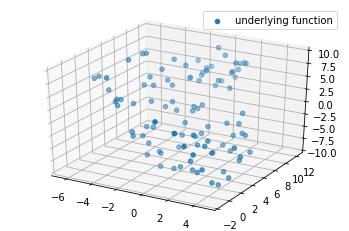

In [57]:
n = 100
d = 3
x = np.random.uniform(-1, 1, (n, d))

# y = w * x + b
# y = w_0 * x_0 + w_1 * x_1 + b
# y = w@x + b

weights1_true = np.array([[5, -1, 3], ]).T
weights2_true = np.array([[1, 8, -3], ]).T
bias1_true = np.array([0.5])
bias2_true = np.array([1])

y1_true = x @ weights1_true + bias1_true
y2_true = x @ weights2_true + bias2_true
y_true = np.hstack((y1_true, y2_true))

print(f'x: {x.shape}, weights1: {weights1_true.shape}, bias1: {bias1_true.shape}, \
  weights2: {weights2_true.shape}, bias2: {bias2_true.shape}, y1: {y1_true.shape}, \
  y2: {y2_true.shape},y: {y_true.shape}')

plot_3d(x, y_true[:,0])
plot_3d(x, y_true[:,1])

## Running the model

18.477744871319786
11.6131951162535


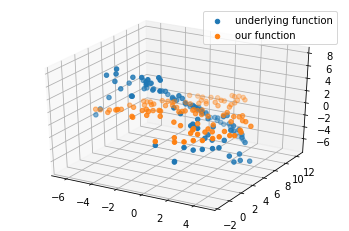

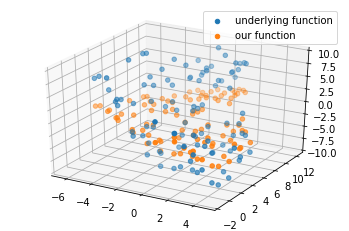

In [58]:
#Testing it out with 1 cycle

loss = MSE()
model = Model(d, 10)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)
loss_gradient = loss.backward()
model.backward(loss_gradient)
model.update(0.1)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)
plot_3d(x, y_true[:,0], y_pred[:,0])
plot_3d(x, y_true[:,1], y_pred[:,1])

Epoch 0, loss 11.6131951162535
Epoch 5, loss 0.7502889199114534
Epoch 10, loss 0.38612949533854624
Epoch 15, loss 6.579576777166103
Epoch 20, loss 0.5406920419902813
Epoch 25, loss 0.29495929061278386
Epoch 30, loss 0.1885336685864114
Epoch 35, loss 0.13071962889574662


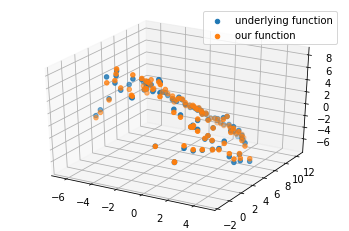

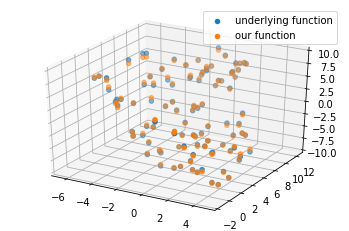

In [59]:
# Fit for 40 epochs

fit(x, y_true, model=model, loss=loss, lr=0.1, num_epochs=40)
y_pred = model(x)
plot_3d(x, y_true[:,0], y_pred[:,0])
plot_3d(x, y_true[:,1], y_pred[:,1])